<a href="https://colab.research.google.com/github/Sh4ki24/prolog-examples/blob/master/DNA_CNN_Shakila_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu==2.0.0

#import libraries

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.3.0


#import files
    # input:    filenames.txt file and filenames.csv  like:TP53_seq
    # output:   variables of gene sequences(.tetx files) and dataframe of csv files like:TP53

In [8]:
def open_files(data_seq):
    import sys
    list_seq_names=[]
    this = sys.modules[__name__]
    for i in data_seq:
        name=i.split('_')
        name=name[0].upper()
        with open(i,'r') as f:
            setattr(this,'%s_seq'%name,f.read())
            list_seq_names.append('%s_seq'%name)
            setattr(this,'%s'%name,pd.read_csv("%s.csv"%name))
    return list_seq_names


data_seq=["TP53_NC_000017.10[7572960..7590690].fa","IDH1_NC_000002.11[209101841..209116292].fa","BRAF_NC_000007.13[140418889..140624469].fa","pik3ca_NC_000003.11[178859120..178965212].fa","brca2_NC_000013.10[32889617..32973809].fa","LRP1B_NC_000002.11[140988996..142889270](-).fa"]
var_names=open_files(data_seq)
var_names

['TP53_seq', 'IDH1_seq', 'BRAF_seq', 'PIK3CA_seq', 'BRCA2_seq', 'LRP1B_seq']

#DataSets



downloaded from https://www.cbioportal.org/datasets

MSK, Cancer Cell 2018

TCGA, Firehose Legacy

TCGA, PanCancer Atlas

Mayo Clinic, 2019

Broad, Cell 2012 and 2014 and 2019

OncoSG, Nat Genet 











because of kernel crashing I split LRP1B seq to 4 parts

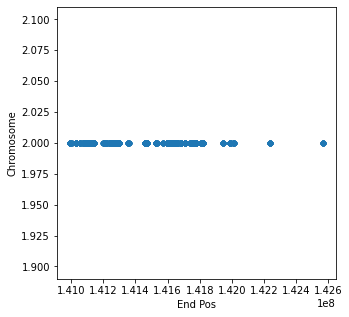

In [9]:
LRP1B.plot(x='End Pos',y='Chromosome',kind="scatter",figsize=(5,5))

In [10]:
LRP1B_df09_12=LRP1B
for i in LRP1B.index:
  if LRP1B.loc[i]["Start Pos"]>=141200000:
    LRP1B_df09_12=LRP1B_df09_12.drop(i)


LRP1B_df12_15=LRP1B
for i in LRP1B.index:
  if 141500000<=LRP1B_df12_15.loc[i]["Start Pos"] or LRP1B_df12_15.loc[i]["Start Pos"]<=141200000:
    LRP1B_df12_15=LRP1B_df12_15.drop(i)

LRP1B_df15_18=LRP1B
for i in LRP1B.index:
  if LRP1B.loc[i]["Start Pos"]<=141500000 or LRP1B.loc[i]["End Pos"]>=141800000:
    LRP1B_df15_18=LRP1B_df15_18.drop(i)


LRP1B_df18_21=LRP1B
for i in LRP1B.index:
  if LRP1B.loc[i]["Start Pos"]<=141800000 or LRP1B.loc[i]["End Pos"]>=142100000:
    LRP1B_df18_21=LRP1B_df18_21.drop(i)


print(len(LRP1B_df09_12),len(LRP1B_df12_15),len(LRP1B_df15_18),len(LRP1B_df18_21))

742 789 769 292


GRch37 
Genome reference downloaded from NCBI (www.ncbi.nlm.nih.gov/) have exteranl data to delete

In [11]:
BRAF_seq[:150]

'>gi|224589819|ref|NC_000007.13|:140434413-140640202 Homo sapiens chromosome 7, GRCh37.p13 Primary Assembly<\nGCACCATATCCCCCTGCCTGGATGGGTGTTTTTGGAGAAGCA'

In [12]:
def sequence_arrange(n):
    n=n.replace("\n","").split("<")
    n=n[1]
    return n
# it can be list like REturn list(n)

In [13]:
TP53_seq=sequence_arrange(TP53_seq)
PIK3CA_seq=sequence_arrange(PIK3CA_seq)
IDH1_seq=sequence_arrange(IDH1_seq)
LRP1B_seq=sequence_arrange(LRP1B_seq)
BRCA2_seq=sequence_arrange(BRCA2_seq)
BRAF_seq=sequence_arrange(BRAF_seq)

In [14]:
BRAF_seq[:150]

'GCACCATATCCCCCTGCCTGGATGGGTGTTTTTGGAGAAGCACAAGCATATAGACTAAAATCCTCTGTTTGGAAACCAGCCCGATTCAAGGAGGGTTCTGATGCACTGCGGTGAATTTTTGGCAATGAGCGGGCCAGCAGCTCAATAGAG'

findings sampele_IDs with more than two mutations in their genes


In [ ]:
TP53.head()

,Study,Sample ID,Chromosome,Start Pos,End Pos,Ref,Var,HGVSg
0,Skin,TCGA-3N-A9WD-06,17,7578509,7578509,A,C,17:g.7578509A>C
1,Skin,TCGA-BF-A1Q0-01,17,7577082,7577082,C,T,17:g.7577082C>T
2,Skin,TCGA-BF-A3DL-01,17,7578263,7578263,G,A,17:g.7578263G>A
3,Skin,TCGA-D3-A2J6-06,17,7576858,7576858,G,T,17:g.7576858G>T
4,Skin,TCGA-D3-A2JA-06,17,7578196,7578196,A,C,17:g.7578196A>C


In [ ]:

list_avalable1 =[]
list_avalable2=[]


def sample_corection(n):
    n=n.set_index(n["Sample ID"])
    m=n["Sample ID"].drop_duplicates()
    return n,m

(TP53,m),(BRAF,o),(BRCA2,mb),(PIK3CA,mc),(IDH1,idh)=sample_corection(TP53),sample_corection(BRAF),sample_corection(BRCA2),sample_corection(PIK3CA),sample_corection(IDH1)
(LRP1B_df09_12,lrp1),(LRP1B_df12_15 ,lrp2),(LRP1B_df15_18 ,lrp3),(LRP1B_df18_21 ,lrp4)=sample_corection(LRP1B_df09_12),sample_corection(LRP1B_df12_15),sample_corection(LRP1B_df15_18),sample_corection(LRP1B_df18_21)
for i in list(lrp1) and list(lrp2) and list(lrp3) and list(lrp4):
    if i in list(m) or i in list(o) or i in list(mb) or i in list(mc) or i in list(idh) :
        list_avalable1.append(i)
for i in list(m) and list(o) and list(idh):
    if i in list(mb) or i in list(mc) or i in list(idh) or i in list(lrp1) or i in list(lrp2) or i in list(lrp3) or i in list(lrp4):
        list_avalable2.append(i)
for i in list(idh) and list(m) and list(mb):
    if i in list(o) or i in list(mc) or i in list(lrp1) or i in list(lrp2) or i in list(lrp3) or i in list(lrp4):
        list_avalable2.append(i)
for i in list(o) and list(mb) and list(idh):
    if i in list(m) or i in list(mc) or i in list(lrp1) or i in list(lrp2) or i in list(lrp3) or i in list(lrp4):
        list_avalable2.append(i)
for i in list(idh) and list(m) and list(mc):
    if i in list(m) or i in list(o) or i in list(lrp1) or i in list(lrp2) or i in list(lrp3) or i in list(lrp4):
        list_avalable2.append(i)
print(len(list_avalable1),len(list_avalable2))

list_avalable_all=list_avalable1+list_avalable2
list_avalable=[]
[list_avalable.append(x) for x in list_avalable_all if x not in list_avalable]
len(list_avalable)

109 1263


1025

searching labels and save them in new var

In [ ]:
final_labels=[]
print(len(list_avalable))
for i in list_avalable:
  if i in TP53['Sample ID']:
    if str(type(TP53.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=TP53.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(TP53.loc[i]['Study'])

  elif i in IDH1['Sample ID']:
    if str(type(IDH1.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=IDH1.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(IDH1.loc[i]['Study'])  

  elif i in BRAF['Sample ID']:
    if str(type(BRAF.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=BRAF.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(BRAF.loc[i]['Study'])
    
  elif i in BRCA2['Sample ID']:
    if str(type(BRCA2.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=BRCA2.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(BRCA2.loc[i]['Study'])
    
  elif i in LRP1B['Sample ID']:
    if str(type(LRP1B.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=LRP1B.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(LRP1B.loc[i]['Study'])
    
  elif i in PIK3CA['Sample ID']:
    if str(type(PIK3CA.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
      a=PIK3CA.loc[i]
      final_labels.append(a.iloc[0]['Study'])
    else:
      final_labels.append(PIK3CA.loc[i]['Study'])
  else:
    print(i)
len(final_labels)

1025


1025

gene sequences where too long so I split them to fit to the minimum and maximum pos

> Indented block

> Indented block

1.   List item
2.   List item







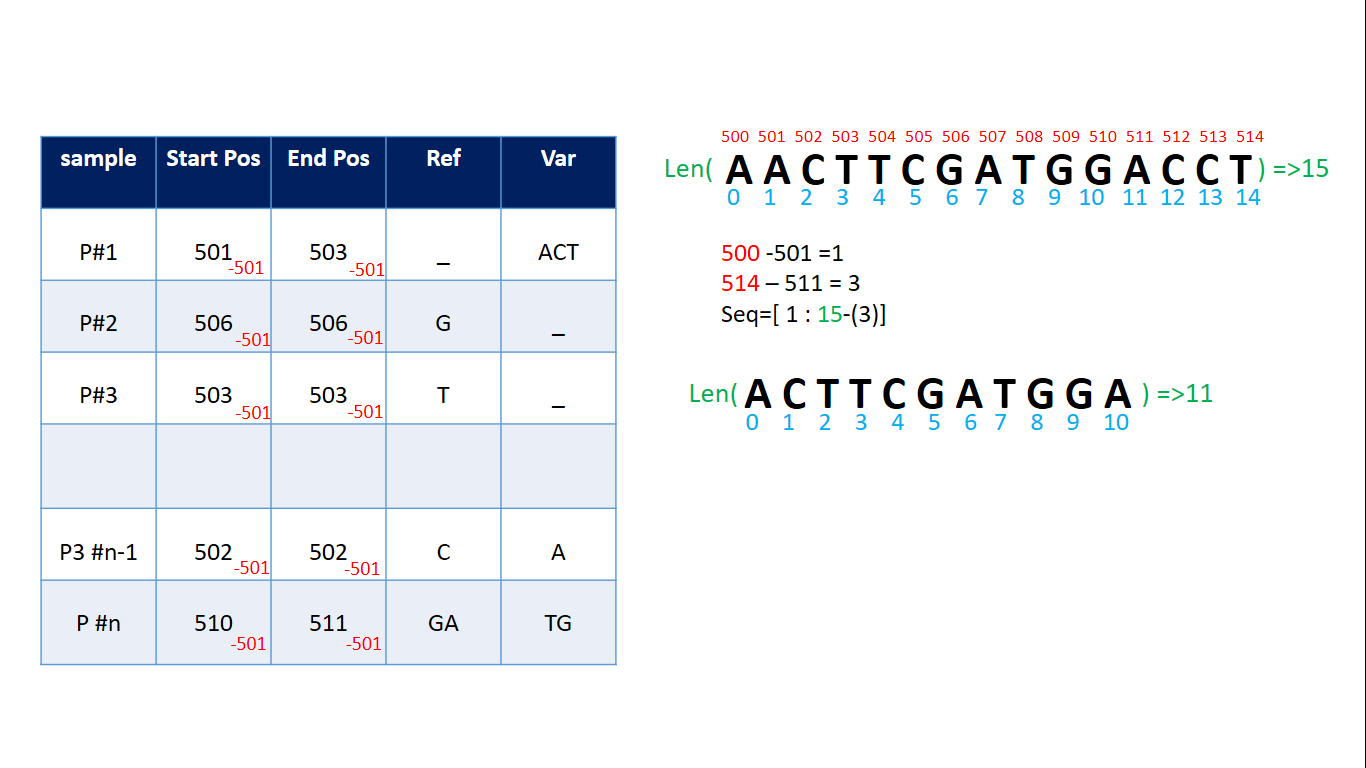

In [ ]:
def fit_sequence(n,n1,m,e):
    m=n['Start Pos'].min()-m
    e=e-n['End Pos'].max()
    base_seq=n1[m:len(n1)-(e)]
    
    n['End Pos']=n['End Pos']-n['Start Pos'].min()
    n['Start Pos']=n['Start Pos']-n['Start Pos'].min()
    list_seq.append(base_seq)
    
    return base_seq

In [ ]:
list_seq=[]
TP53_seq=fit_sequence(TP53,TP53_seq,7572960,7590690)
BRAF_seq=fit_sequence(BRAF,BRAF_seq,140434413,140640202)
PIK3CA_seq=fit_sequence(PIK3CA,PIK3CA_seq,178916614,178958099)
IDH1_seq=fit_sequence(IDH1,IDH1_seq,209116292,209101841)
LRP1B_seq=fit_sequence(LRP1B ,LRP1B_seq,140990769,141987010)

BRCA2_seq=fit_sequence(BRCA2,BRCA2_seq,32890607,32973804 )

In [ ]:
LRP1B_seq09_12=fit_sequence(LRP1B_df09_12 ,LRP1B_seq,140990769,141987010)
LRP1B_seq12_15=fit_sequence(LRP1B_df12_15 ,LRP1B_seq,140990769,141987010)
LRP1B_seq15_18=fit_sequence(LRP1B_df15_18 ,LRP1B_seq,140990769,141987010)
LRP1B_seq18_21=fit_sequence(LRP1B_df18_21 ,LRP1B_seq,140990769,141987010)

In [ ]:
print("LRPl:",len(LRP1B_seq),"BRCA:",len(BRCA2_seq),"BRAF:",len(BRAF_seq),"PIK:",len(PIK3CA_seq),'TP53:',len(TP53_seq))

LRPl: 996242 BRCA: 82251 BRAF: 115528 PIK: 35538 TP53: 6920


add mutations to the sequences for those who have mut and use empty seq for rest of them

> exp: p#1 has mutation in TP53 and BRAF so 


>  TP53 [AATGC...] , BRAF [TGACGTA..] ,BRCA2 [] ,PIK3CA [] ,LRP1B []





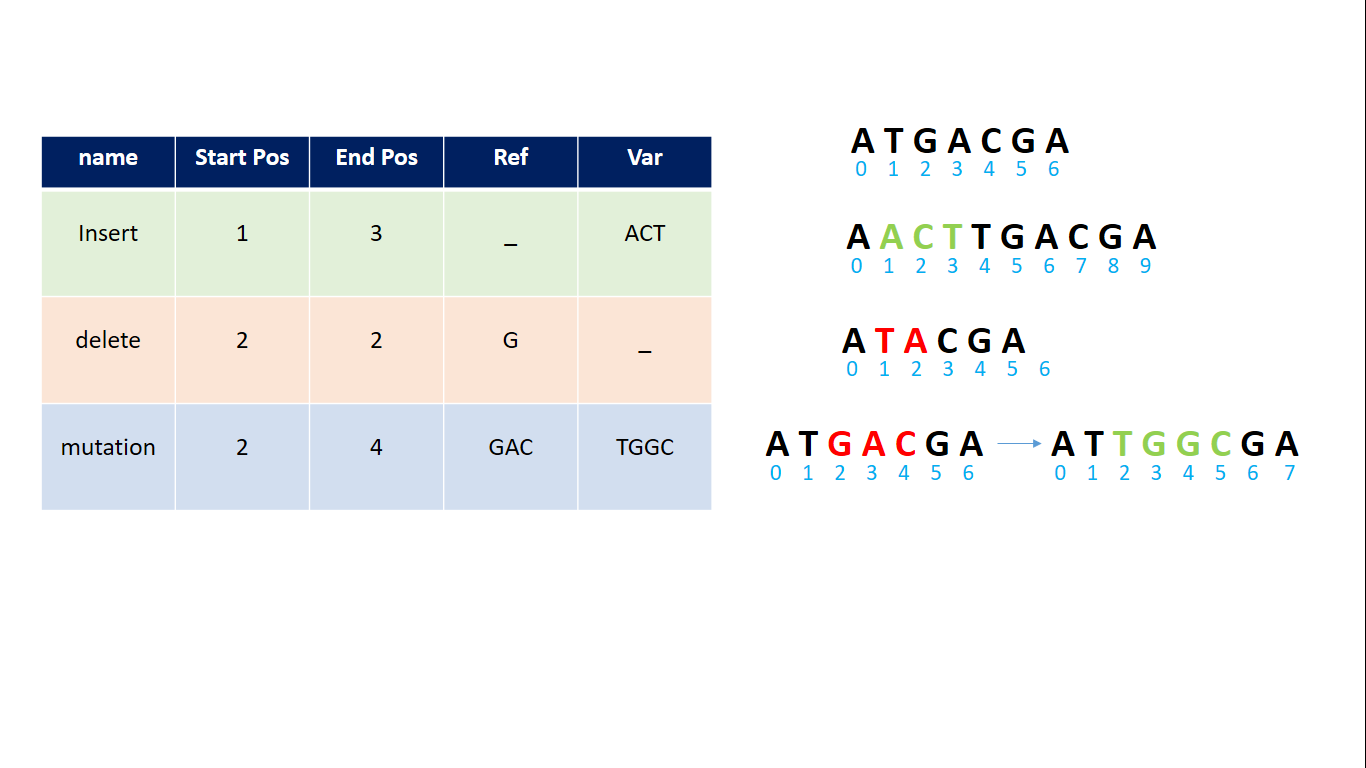

In [ ]:

def insert(gene,index_pos,Var):
    gene = gene[:index_pos] + Var + gene[index_pos:]
    return gene
       # contain

In [ ]:

def delete(gene,index_pos,Ref):
    gene = gene[:index_pos] + gene[len(Ref)+index_pos:]
    return gene
       # contain

In [ ]:
#sample
gene="ATGACGA"
print(insert(gene,1,"fff"))
print(delete(gene,2,'G'))

AfffTGACGA
ATACGA


In [ ]:
def new_list(i,Gene_seq,Gene):
  global s,t
  t=Gene_seq
  Gene=Gene.drop_duplicates()

  if i in Gene["Sample ID"]:
    
      if str(type(Gene.loc[i]))=="<class 'pandas.core.frame.DataFrame'>":
          a=Gene.loc[i]
          a=a.set_index(a["Start Pos"]).sort_index(ascending=False)
          for j in a.index:
            if str(a.loc[j]["Var"])=='-':
              t=delete(t,j,a.loc[j]["Ref"])
              pass
            if str(a.loc[j]["Ref"])=='-':
              t=insert(t,j,a.loc[j]["Var"])
              pass
            if str(a.loc[j]["Ref"])!='-' and str(a.loc[j]["Var"])!='-':
              t=delete(t,j,a.loc[j]["Ref"])
              t=insert(t,j,a.loc[j]["Var"])
            #t=mut1(t,j,a.loc[j]["Var"])
            #s=a.loc[j]["Study"]
      else:
        if str(Gene.loc[i]["Var"])=='-':
          t=delete(t,Gene.loc[i]["Start Pos"],Gene.loc[i]["Ref"])
          pass
        if str(Gene.loc[i]["Ref"])=='-':
          t=insert(t,Gene.loc[i]["Start Pos"],Gene.loc[i]["Var"])
          pass
        if str(Gene.loc[i]["Var"])!='-' and str(Gene.loc[i]["Ref"])!='-':
          t=delete(t,Gene.loc[i]["Start Pos"],Gene.loc[i]["Ref"])
          t=insert(t,Gene.loc[i]["Start Pos"],Gene.loc[i]["Var"])

          #t=mut1(t,Gene.loc[i]["Start Pos"],Gene.loc[i]["Var"])
        #s=Gene.loc[i]["Study"]
  else:
     t=""             
  #while t.count("-")>0:
   # t = t[:t.find("-")] + t[t.find("-")+1:]   
  return t

#k-mers bioinformatic algorithm


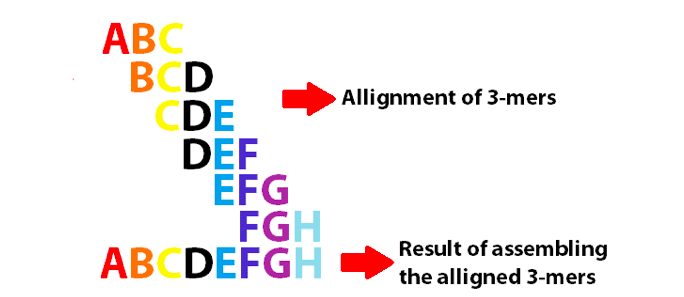

In [ ]:
def getkmer(sequence,size=3):
    return [sequence[x:x+size] for x in range(len(sequence)-size+1)]

In [ ]:

def dataframe(geneseq,Genename,name):
    data=pd.DataFrame()
    for genes in list_avalable:
      Gn=new_list(genes,geneseq,Genename)
      data=data.append(pd.Series({"Sample ID":genes,'%s'%name:Gn}),ignore_index=True)
    return (data)

In [ ]:
data_TP53=(dataframe(TP53_seq,TP53,'TP53'))
data_TP53.sort_index()

data_TP53["TP53"]=data_TP53.apply(lambda x: getkmer(x["TP53"]),axis=1)

In [ ]:
data_TP53.sample(5)

,Sample ID,TP53
427,TCGA-P5-A737-01,[]
414,TCGA-P5-A5EV-01,"[TTT, TTT, TTT, TTT, TTA, TAT, ATG, TGG, GGC, ..."
70,MEL-Ma-Mel-114,"[TTT, TTT, TTT, TTT, TTA, TAT, ATG, TGG, GGC, ..."
1018,D8165,"[TTT, TTT, TTT, TTT, TTA, TAT, ATG, TGG, GGC, ..."
311,TCGA-FG-7641-01,[]


#count repeated sequences

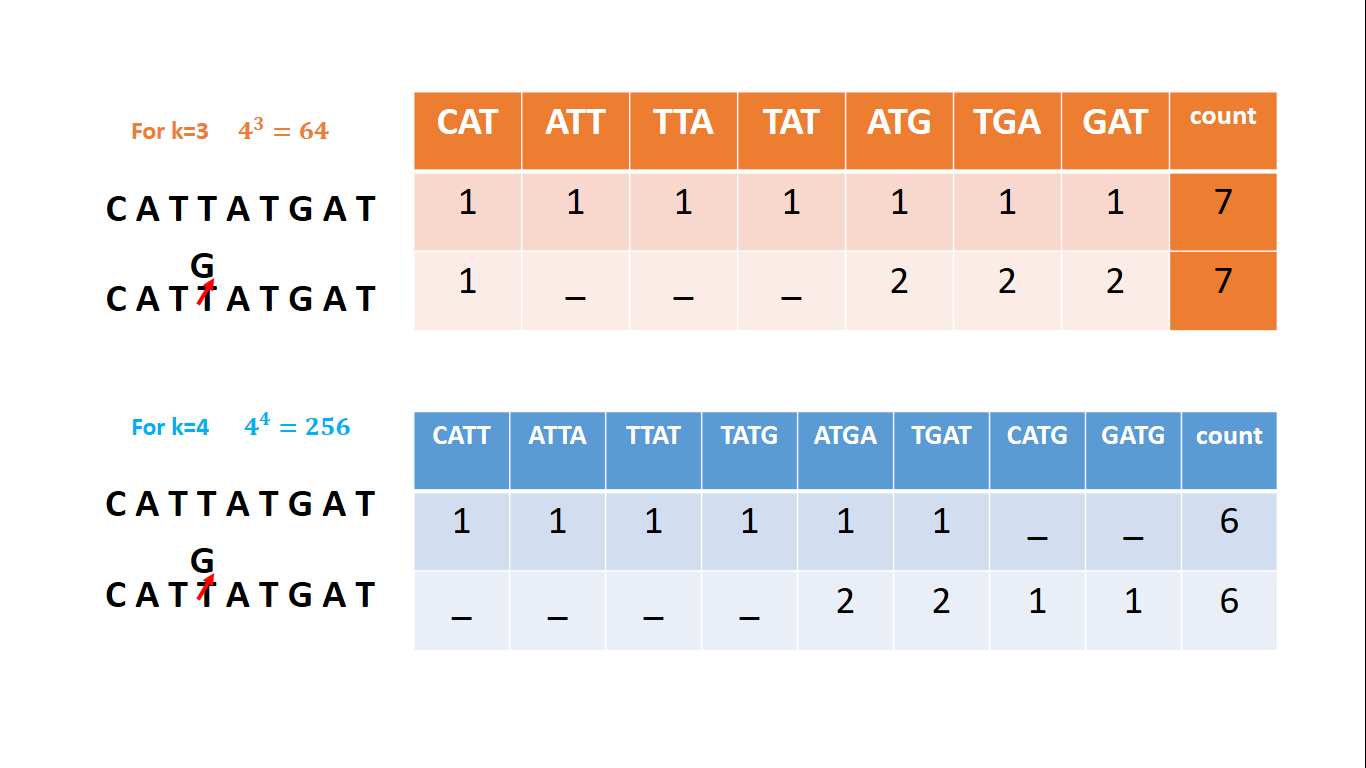

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split("'")
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    if "], [" in counts:counts.pop("], [")
    if ", " in counts:counts.pop(', ')
    if "[[" in counts:counts.pop("[[")
    if "]]" in counts:counts.pop("]]")
    if "[]" in counts:counts.pop("[]")
    if "[" in counts:counts.pop("[")
    if "]" in counts:counts.pop("]")
    return counts

words=word_count(str(data_TP53.loc[2]["TP53"]))
seprated_seq=list((word_count(str(data_TP53.loc[266]["TP53"]))).keys())


In [ ]:
'''#برای نمایش 
TP53_w=data2
for case_no in data_TP53.index:
    words_tp53=word_count(str(data_TP53.loc[case_no]["TP53"]))
    words_tp53.update({"Study":data_TP53.loc[case_no]["Study"]})
    TP53_w= TP53_w.append(words_tp53,ignore_index=True)'''

'#برای نمایش \nTP53_w=data2\nfor case_no in data_TP53.index:\n    words_tp53=word_count(str(data_TP53.loc[case_no]["TP53"]))\n    words_tp53.update({"Study":data_TP53.loc[case_no]["Study"]})\n    TP53_w= TP53_w.append(words_tp53,ignore_index=True)'

#Final
do the same for all genes

In [ ]:
index=data_TP53.index
def DATA(Gene_seq,Gene,Gene_name):
  #.sort_values("Sample ID")
  data_Gene=(dataframe(Gene_seq,Gene,Gene_name))
  data_Gene[Gene_name]=data_Gene.apply(lambda x: getkmer(x[Gene_name]),axis=1)
  Gene_w=pd.DataFrame()

 
  for case_no in index:
      words_Gene=word_count(str(data_Gene.loc[case_no][Gene_name]))
      #words_Gene.update({"Study":data_Gene.loc[case_no]["Study"]})
      Gene_w= Gene_w.append(words_Gene,ignore_index=True)
      #Gene_w["Study"]=final_labels
  Gene_w=Gene_w.fillna(0)
  return Gene_w

In [ ]:
def DATA_SAVE(Gene_seq,Gene,Gene_name):
  
  data_Gene=(dataframe(Gene_seq,Gene,Gene_name))
  data_Gene[Gene_name]=data_Gene.apply(lambda x: getkmer(x[Gene_name]),axis=1)
  Gene_w=pd.DataFrame()


  for case_no in index:
      words_Gene=word_count(str(data_Gene.loc[case_no][Gene_name]))
      #words_Gene.update({"Study":data_Gene.loc[case_no]["Study"]})
      Gene_w= Gene_w.append(words_Gene,ignore_index=True)
      
  words=word_count(str(getkmer(Gene_seq)))
  Gene_w=Gene_w.fillna(value=words)    
  Gene_w["Study"]=final_labels

  Gene_w.to_csv("%s_W.csv"%Gene_name)
  return Gene_w

In [ ]:
DATA_SAVE(TP53_seq,TP53,"TP53")

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Study
0,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
1,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
2,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
3,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
4,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
1021,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
1022,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin
1023,195.0,76.0,122.0,90.0,92.0,96.0,31.0,102.0,139.0,137.0,198.0,120.0,65.0,75.0,101.0,80.0,121.0,113.0,198.0,82.0,162.0,136.0,41.0,160.0,22.0,41.0,48.0,28.0,62.0,152.0,191.0,104.0,90.0,77.0,183.0,86.0,128.0,150.0,37.0,136.0,144.0,158.0,191.0,124.0,81.0,77.0,144.0,76.0,77.0,55.0,91.0,63.0,132.0,117.0,30.0,111.0,131.0,115.0,180.0,106.0,78.0,87.0,96.0,187.0,Skin


In [ ]:
#DATA_SAVE(LRP1B_seq,LRP1BA,"LRP1B")

In [ ]:
DATA_SAVE(PIK3CA_seq,PIK3CA,"PIK3CA")

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Study
0,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
1,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
2,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
3,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
4,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1576.0,480.0,681.0,1103.0,620.0,339.0,73.0,568.0,697.0,406.0,458.0,695.0,951.0,474.0,692.0,1184.0,592.0,383.0,569.0,648.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,95.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,299.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,782.0,721.0,441.0,527.0,820.0,1025.0,740.0,793.0,2026.0,Skin
1021,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,56.0,94.0,517.0,448.0,561.0,755.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,83.0,782.0,721.0,441.0,528.0,820.0,1025.0,739.0,794.0,2027.0,Skin
1022,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,446.0,561.0,756.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,781.0,721.0,441.0,527.0,820.0,1025.0,741.0,793.0,2027.0,Skin
1023,1576.0,480.0,681.0,1103.0,621.0,339.0,72.0,568.0,697.0,406.0,458.0,695.0,951.0,475.0,692.0,1184.0,592.0,383.0,569.0,649.0,502.0,289.0,65.0,492.0,69.0,49.0,57.0,94.0,517.0,446.0,561.0,756.0,686.0,274.0,452.0,491.0,399.0,296.0,48.0,439.0,416.0,286.0,256.0,340.0,568.0,298.0,464.0,619.0,986.0,463.0,554.0,1058.0,671.0,424.0,84.0,781.0,721.0,441.0,527

In [ ]:
DATA_SAVE(IDH1_seq,IDH1,"IDH1")

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Study
0,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
1,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
2,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
3,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
4,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
1021,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
1022,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin
1023,674.0,261.0,309.0,337.0,306.0,179.0,36.0,269.0,315.0,194.0,283.0,232.0,300.0,181.0,256.0,312.0,305.0,206.0,299.0,250.0,272.0,160.0,36.0,251.0,26.0,34.0,35.0,33.0,195.0,243.0,265.0,324.0,298.0,140.0,211.0,197.0,203.0,182.0,27.0,190.0,222.0,161.0,175.0,171.0,167.0,114.0,166.0,226.0,304.0,183.0,205.0,265.0,279.0,199.0,29.0,317.0,283.0,213.0,236.0,237.0,295.0,285.0,282.0,609.0,Skin


In [ ]:
DATA_SAVE(BRCA2_seq,BRCA2,"BRCA2")

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Study
0,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1651.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,708.0,1239.0,1407.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1725.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3973.0,Skin
1,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3971.0,Skin
2,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3971.0,Skin
3,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3971.0,Skin
4,3569.0,1165.0,1754.0,2247.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1407.0,1577.0,1798.0,1049.0,1471.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,925.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1805.0,2022.0,1594.0,1732.0,3971.0,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3971.0,Skin
1021,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0,1359.0,1804.0,2022.0,1594.0,1732.0,3971.0,Skin
1022,3569.0,1165.0,1755.0,2246.0,1491.0,860.0,178.0,1364.0,1919.0,1064.0,1408.0,1577.0,1798.0,1049.0,1470.0,2290.0,1443.0,1017.0,1560.0,1373.0,1232.0,743.0,208.0,1246.0,168.0,148.0,174.0,237.0,1064.0,1146.0,1491.0,1652.0,1775.0,677.0,1357.0,1193.0,1095.0,807.0,163.0,1017.0,1164.0,852.0,751.0,926.0,1190.0,709.0,1239.0,1406.0,1948.0,1034.0,1297.0,1795.0,1575.0,1019.0,178.0,1726.0,1751.0,1018.0

In [ ]:
DATA_SAVE(BRAF_seq,BRAF,"BRAF")

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Study
0,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2197.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1705.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1738.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2335.0,1571.0,207.0,2442.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
1,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2196.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1704.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1739.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2334.0,1571.0,207.0,2444.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
2,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2197.0,2610.0,1387.0,1812.0,1906.0,2853.0,1681.0,2033.0,3092.0,2579.0,1705.0,2045.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,223.0,201.0,1752.0,1738.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1411.0,1105.0,195.0,1394.0,1524.0,1156.0,1192.0,1219.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2335.0,1571.0,207.0,2442.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
3,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2197.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1705.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1738.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2335.0,1571.0,207.0,2442.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
4,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2197.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1705.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1738.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2335.0,1571.0,207.0,2442.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2196.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1704.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1739.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2334.0,1571.0,207.0,2444.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
1021,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2196.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1704.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1739.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.0,1504.0,2691.0,2334.0,1571.0,207.0,2444.0,2138.0,1353.0,1864.0,2036.0,2847.0,2198.0,1880.0,4705.0,Skin
1022,5821.0,2051.0,2526.0,3363.0,2662.0,1378.0,275.0,2196.0,2610.0,1387.0,1812.0,1905.0,2853.0,1681.0,2033.0,3092.0,2579.0,1704.0,2044.0,2087.0,2008.0,1049.0,210.0,1836.0,255.0,208.0,224.0,201.0,1752.0,1739.0,2120.0,2259.0,2342.0,1027.0,1640.0,1518.0,1410.0,1105.0,196.0,1394.0,1524.0,1156.0,1192.0,1220.0,1491.0,939.0,1358.0,1574.0,3019.0,1729.

In [ ]:
LRP1B_09=DATA(LRP1B_seq09_12,LRP1B_df09_12,"LRP1B09")

In [ ]:
LRP1B_12=DATA(LRP1B_seq12_15,LRP1B_df12_15,"LRP1B12")

In [ ]:
LRP1B_15=DATA(LRP1B_seq15_18,LRP1B_df15_18,"LRP1B15")
LRP1B_18=DATA(LRP1B_seq18_21,LRP1B_df18_21,"LRP1B18")


In [ ]:
LRP=(LRP1B_18.fillna(0))+(LRP1B_15.fillna(0))+(LRP1B_12.fillna(0))+(LRP1B_09.fillna(0))
LRP=LRP.replace(0,value=np.nan)
words=word_count(str(getkmer(LRP1B_seq)))
LRP["Study"]=final_labels
LRP=LRP.fillna(value=words)
LRP.to_csv("LRP1B_W.csv")

#PART2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D, Input,Flatten, Dropout,BatchNormalization,MaxPooling1D,MaxPool1D,AveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, Embedding
from tensorflow.keras.models import Model
import pandas as pd

In [ ]:

def open_files(data_seq):
    import sys
    this = sys.modules[__name__]
    for i in data_seq:
      setattr(this,'%s'%i,(pd.read_csv("%s.csv"%i)).drop("Unnamed: 0",axis=1).sort_index(axis=1))

open_files(["TP53_W","BRAF_W","BRCA2_W","PIK3CA_W","LRP1B_W","IDH1_W"])

In [ ]:
print(TP53_W.shape,BRCA2_W.shape,BRAF_W.shape,LRP1B_W.shape,PIK3CA_W.shape,IDH1_W.shape)


(1025, 65) (1025, 65) (1025, 65) (1025, 65) (1025, 65) (1025, 65)


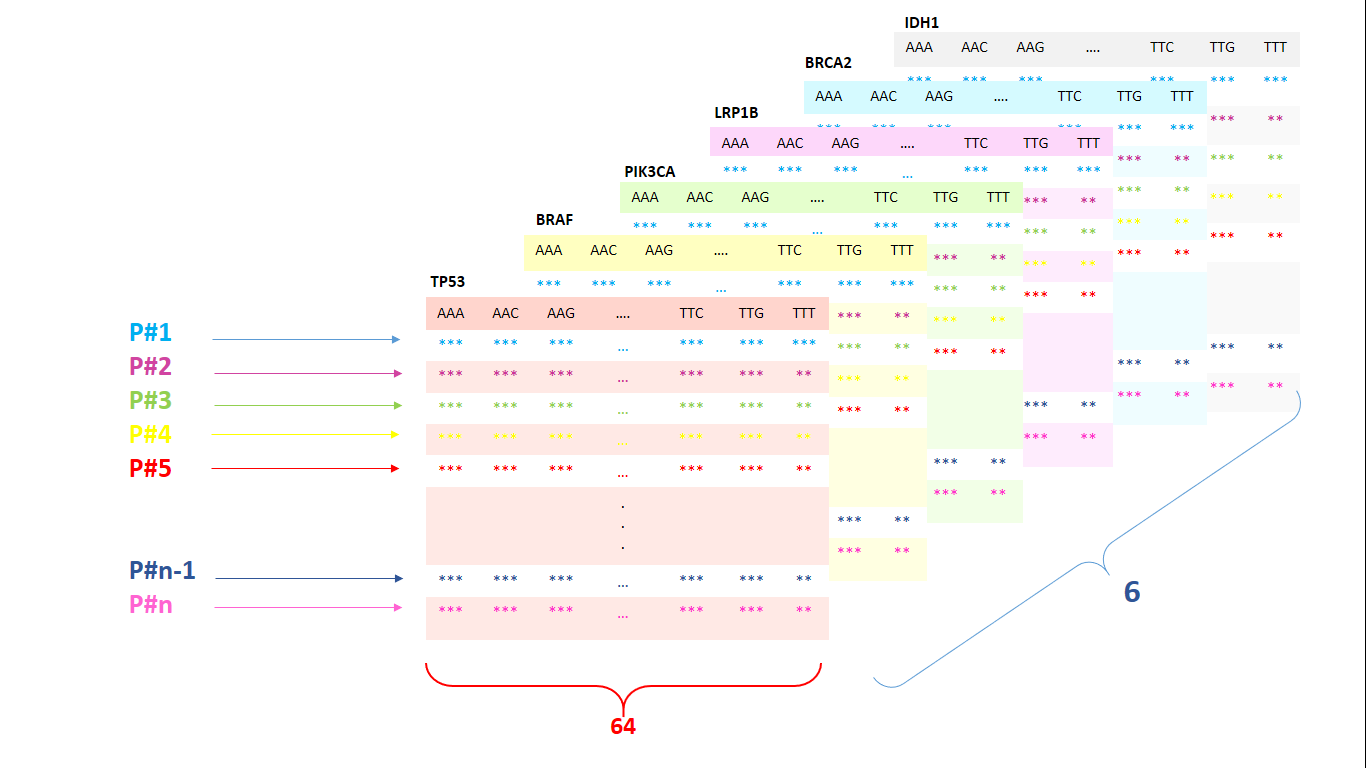

In [ ]:

def dimension():
  qlist=[]
  for i in range(len(TP53_W)):
    z=list(zip(TP53_W.iloc[i],BRAF_W.iloc[i],PIK3CA_W.iloc[i],LRP1B_W.iloc[i],BRCA2_W.iloc[i],IDH1_W.iloc[i]))
    #,
    #z[48]or192
    z.remove(z[48])
    qlist.append(np.reshape(z,(64,6)))
  return np.array(qlist)

In [ ]:
full_converted=dimension()
full_converted.shape

(1025, 64, 6)

reference genes with k_mers and count def applied on them 

used for comparing

#data augmenetation

In [ ]:

from numpy.random import randint

refrence=np.full((64,5),[0,1,2,3,4])

TP5=word_count(str(getkmer(TP53_seq)))
TP5=list(TP5.values())

BRA=word_count(str(getkmer(BRAF_seq)))
BRA=list(BRA.values())

BRC=word_count(str(getkmer(BRCA2_seq)))
BRC=list(BRC.values())

LRP=word_count(str(getkmer(LRP1B_seq)))
LRP=list(LRP.values())

PIK=word_count(str(getkmer(PIK3CA_seq)))
PIK=list(PIK.values())

IDH=word_count(str(getkmer(IDH1_seq)))
IDH=list(IDH.values())

for i in range(64):
  refrence[i]=[TP5[i],BRA[i],PIK[i],BRC[i],IDH[i]]
  #refrence[i]=[TP5[i],BRA[i],PIK[i],LRP[i],BRC[i],IDH[i]]

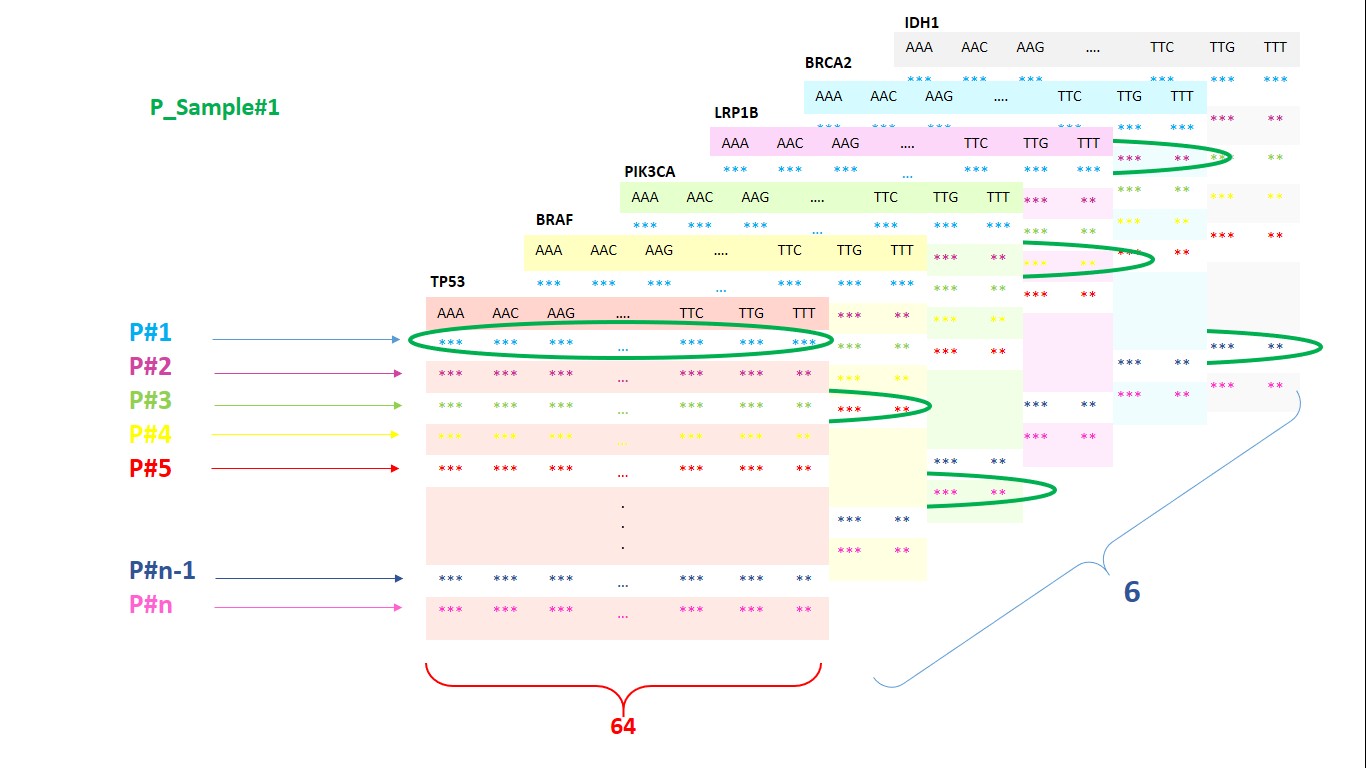

In [ ]:
labels=TP53_W["Study"]
def augmenetation(name,number):

  list_index=[]
  extra_data=[]
  for i in range(len(full_converted)-1):
    if str(labels[i])==str(name):
      list_index.append(i)
      
  for i in range(number):
    Tp=np.full((64,6),np.nan)
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][0]=full_converted[rnd][j][0]
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][1]=full_converted[rnd][j][1]
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][2]=full_converted[rnd][j][2]
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][3]=full_converted[rnd][j][3]
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][4]=full_converted[rnd][j][4]
    rnd=randint(0,len(list_index))
    for j in range(64):
      Tp[j][5]=full_converted[rnd][j][5]
    
    eq=refrence==Tp
    if eq==False:
      extra_data.append(Tp)
  return extra_data,len(extra_data)


def add_data(types,numbers):
  global full_converted,labels
  Study,numb=augmenetation(types,numbers)
  full_converted=(np.append(full_converted,Study)).reshape(len(full_converted)+len(Study),full_converted[0].shape[0],full_converted[0].shape[1])
  a=np.full(numb,types)
  labels=(np.append(labels,a))
  print("new len:",len(full_converted),"equal?",len(labels)==len(full_converted),"count:",numb)

In [ ]:

len(full_converted)==len(labels)

True

In [ ]:
full_converted.shape

(1025, 64, 6)

In [ ]:

print("Breast:", np.count_nonzero(labels == "Breast")," Brain:",np.count_nonzero(labels == "Brain")," Lung:",np.count_nonzero(labels == "Lung")," Skin:",np.count_nonzero(labels == "Skin"))

Breast: 295  Brain: 415  Lung: 172  Skin: 143



give label name and number of the extra data you want



In [ ]:

add_data("Skin",280)
#300↑
add_data("Lung",250)
add_data("Breast",105)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


new len: 1325 equal? True count: 300
new len: 1575 equal? True count: 250
new len: 1680 equal? True count: 105


In [ ]:

print("Breast:", np.count_nonzero(labels == "Breast")," Brain:",np.count_nonzero(labels == "Brain")," Lung:",np.count_nonzero(labels == "Lung")," Skin:",np.count_nonzero(labels == "Skin"))

Breast: 400  Brain: 415  Lung: 422  Skin: 443


#convert data labels to numerical labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(labels)

split train data and test data

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_converted, y, test_size=0.33, random_state=20)

In [ ]:
print(len(y_train))

1125


In [ ]:

K = len(set(y_train))
print("number of classes:", K)

number of classes: 4


#train and test

In [ ]:

input_shape =Input(shape=X_train[0].shape)

x = tf.keras.layers.Conv1D(64, 1, activation=lambda x: (x/2)**3)(input_shape)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(64, 3, activation="tanh")(x)
x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(128, 3, activation="tanh")(x)

x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(256, 3, activation="tanh")(x)
x=BatchNormalization(epsilon=0.1)(x)


x = Flatten()(x)
x=Dropout(0.2)(x)
x = Dense(128, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(256, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(564, activation='tanh')(x)
x=Dropout(0.5)(x)
x = Dense(1024, activation='tanh')(x)
x=Dropout(0.4)(x)
x = Dense(64, activation='tanh')(x)
x=Dropout(0.4)(x)
x = Dense(64, activation='softmax',use_bias=True)(x)
x= Dense(10)(x)
x= Dense(10)(x)
x = Dense(10, activation='softmax')(x)
x= Dense(10)(x)
x= Dense(10)(x)
x=Dropout(0.2)(x)
x = Dense(128, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(256, activation='tanh')(x)
x=Dropout(0.2)(x)
x= Dense(10)(x)
x= Dense(10)(x)
x = Dense(10, activation='softmax')(x)
x= Dense(10)(x)
x= Dense(10)(x)
out = Dense(K)(x)
model=Model(input_shape,out)


#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#sparse_categorical_crossentropy


#train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)


Train on 1128 samples, validate on 557 samples
Epoch 1/15
1128/1128 [==============================] - 3s 3ms/sample - loss: 1.4037 - accuracy: 0.2216 - val_loss: 1.3524 - val_accuracy: 0.3806
Epoch 2/15
1128/1128 [==============================] - 0s 395us/sample - loss: 1.3035 - accuracy: 0.4397 - val_loss: 1.8027 - val_accuracy: 0.4434
Epoch 3/15
1128/1128 [==============================] - 0s 399us/sample - loss: 1.3444 - accuracy: 0.4433 - val_loss: 1.3025 - val_accuracy: 0.4434
Epoch 4/15
1128/1128 [==============================] - 0s 399us/sample - loss: 1.4778 - accuracy: 0.4087 - val_loss: 1.2263 - val_accuracy: 0.4434
Epoch 5/15
1128/1128 [==============================] - 0s 395us/sample - loss: 1.2110 - accuracy: 0.4521 - val_loss: 1.3015 - val_accuracy: 0.4434
Epoch 6/15
1128/1128 [==============================] - 0s 402us/sample - loss: 1.1931 - accuracy: 0.4539 - val_loss: 1.3011 - val_accuracy: 0.4434
Epoch 7/15
1128/1128 [==============================] - 0s 381us/sa

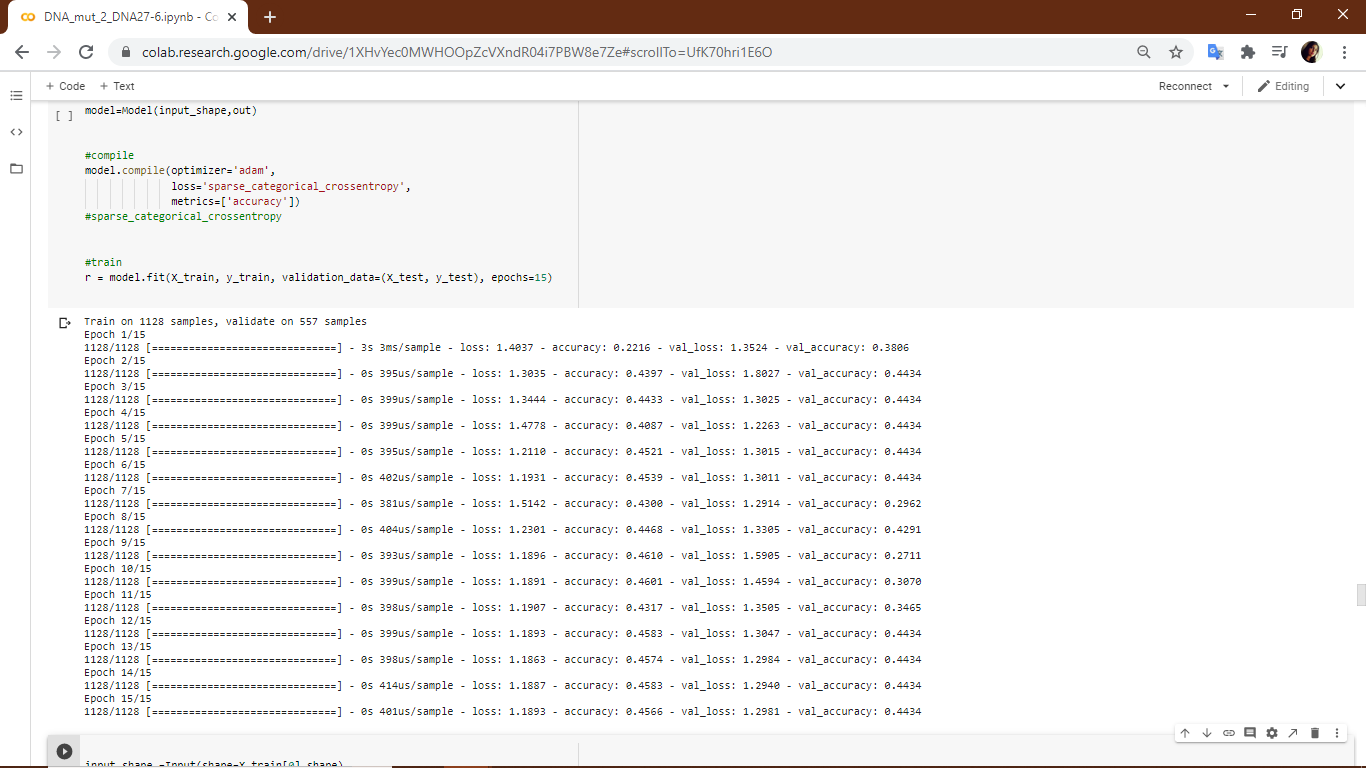

In [ ]:

input_shape =Input(shape=X_train[0].shape)

x = tf.keras.layers.Conv1D(64, 1, activation=lambda x: (x/2)**3)(input_shape)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(64, 3, activation="tanh")(x)
x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(128, 3, activation="relu")(x)

x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(256, 3, activation="tanh")(x)
x=BatchNormalization(epsilon=0.1)(x)


x = Flatten()(x)
x=Dropout(0.2)(x)
x = Dense(128, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(256, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(564, activation='tanh')(x)
x=Dropout(0.5)(x)
x = Dense(1024, activation='tanh')(x)
x=Dropout(0.4)(x)
x = Dense(64, activation='tanh')(x)
x=Dropout(0.4)(x)
x = Dense(10, activation='softmax',use_bias=True)(x)
out = Dense(K)(x)
model=Model(input_shape,out)


#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#sparse_categorical_crossentropy


#train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)
# Breast: 400  Brain: 420  Lung: 422  Skin: 503

Train on 1169 samples, validate on 576 samples
Epoch 1/15
1169/1169 [==============================] - 2s 2ms/sample - loss: 2.5656 - accuracy: 0.3901 - val_loss: 1.5539 - val_accuracy: 0.4288
Epoch 2/15
1169/1169 [==============================] - 0s 326us/sample - loss: 1.5219 - accuracy: 0.4602 - val_loss: 1.6014 - val_accuracy: 0.4444
Epoch 3/15
1169/1169 [==============================] - 0s 326us/sample - loss: 1.6310 - accuracy: 0.4525 - val_loss: 1.5902 - val_accuracy: 0.4444
Epoch 4/15
1169/1169 [==============================] - 0s 328us/sample - loss: 1.4545 - accuracy: 0.4645 - val_loss: 1.5999 - val_accuracy: 0.4444
Epoch 5/15
1169/1169 [==============================] - 0s 330us/sample - loss: 1.5416 - accuracy: 0.4602 - val_loss: 1.5812 - val_accuracy: 0.4549
Epoch 6/15
1169/1169 [==============================] - 0s 323us/sample - loss: 1.6351 - accuracy: 0.4688 - val_loss: 1.5934 - val_accuracy: 0.4549
Epoch 7/15
1169/1169 [==============================] - 0s 336us/sa

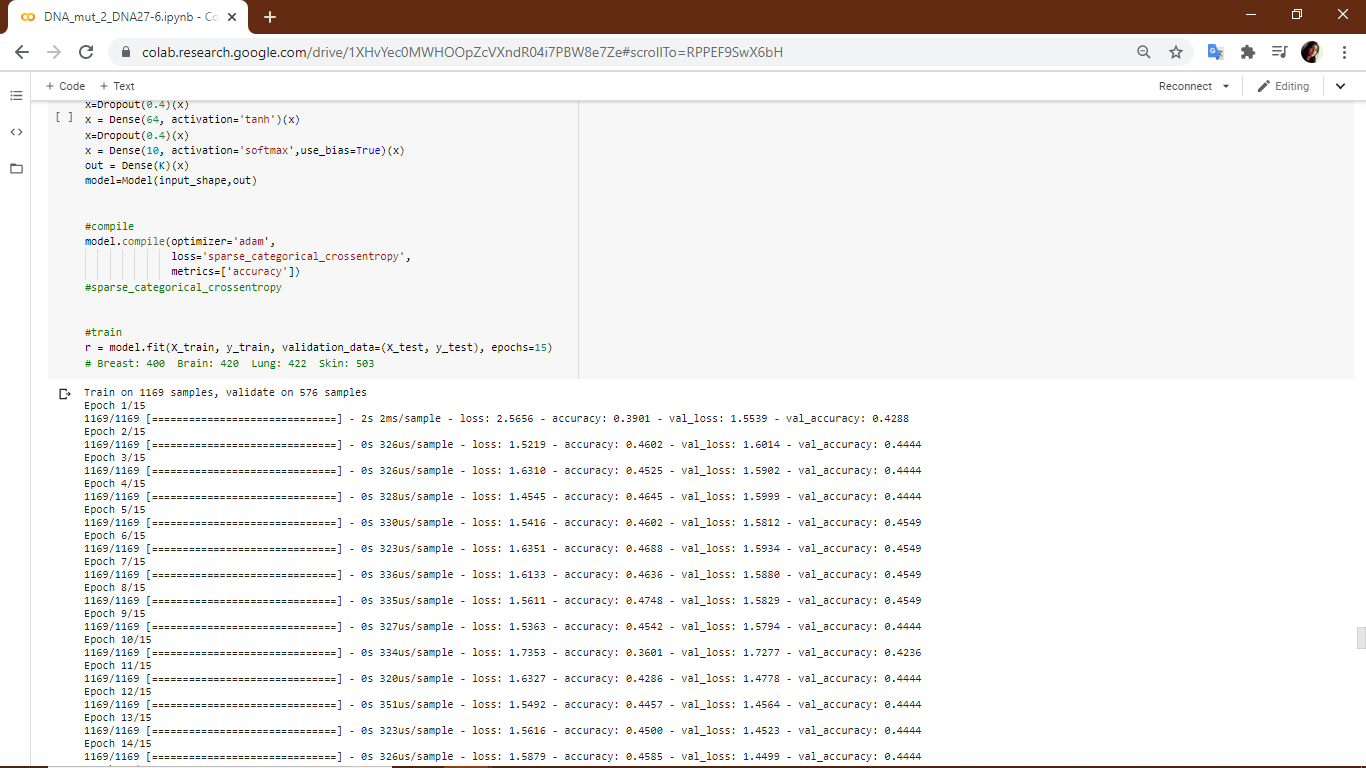

In [ ]:
#ساخت لایه ها
#فرمت ورودی که می شود 64و5 
input_shape =Input(shape=X_train[0].shape)
#اکتیویشن ساخته 

x = tf.keras.layers.Conv1D(64, 1, activation=lambda x: (x/2)**3)(input_shape)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(64, 3, activation="tanh")(x)
x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(128, 3, activation="relu")(x)

x=AveragePooling1D(3)(x)
x=BatchNormalization(epsilon=0.1)(x)
x = tf.keras.layers.Conv1D(256, 3, activation="tanh")(x)
x=BatchNormalization(epsilon=0.1)(x)


x = Flatten()(x)
x=Dropout(0.2)(x)
x = Dense(128, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(256, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(564, activation='tanh')(x)
x=Dropout(0.2)(x)
x = Dense(1024, activation='tanh')(x)
x=Dropout(0.5)(x)
x = Dense(K, activation='softmax',use_bias=True)(x)
out = Dense(K)(x)
model=Model(input_shape,out)


#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#sparse_categorical_crossentropy


#train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)


Train on 686 samples, validate on 339 samples
Epoch 1/20
686/686 [==============================] - 2s 3ms/sample - loss: 2.7139 - accuracy: 0.3484 - val_loss: 2.2664 - val_accuracy: 0.3717
Epoch 2/20
686/686 [==============================] - 0s 357us/sample - loss: 1.7269 - accuracy: 0.3644 - val_loss: 2.2356 - val_accuracy: 0.3717
Epoch 3/20
686/686 [==============================] - 0s 330us/sample - loss: 1.6765 - accuracy: 0.3659 - val_loss: 2.1683 - val_accuracy: 0.3717
Epoch 4/20
686/686 [==============================] - 0s 340us/sample - loss: 1.6780 - accuracy: 0.4096 - val_loss: 2.0506 - val_accuracy: 0.4631
Epoch 5/20
686/686 [==============================] - 0s 357us/sample - loss: 1.6588 - accuracy: 0.5044 - val_loss: 2.0344 - val_accuracy: 0.4631
Epoch 6/20
686/686 [==============================] - 0s 332us/sample - loss: 1.6455 - accuracy: 0.5044 - val_loss: 2.0213 - val_accuracy: 0.4631
Epoch 7/20
686/686 [==============================] - 0s 345us/sample - loss: 1.

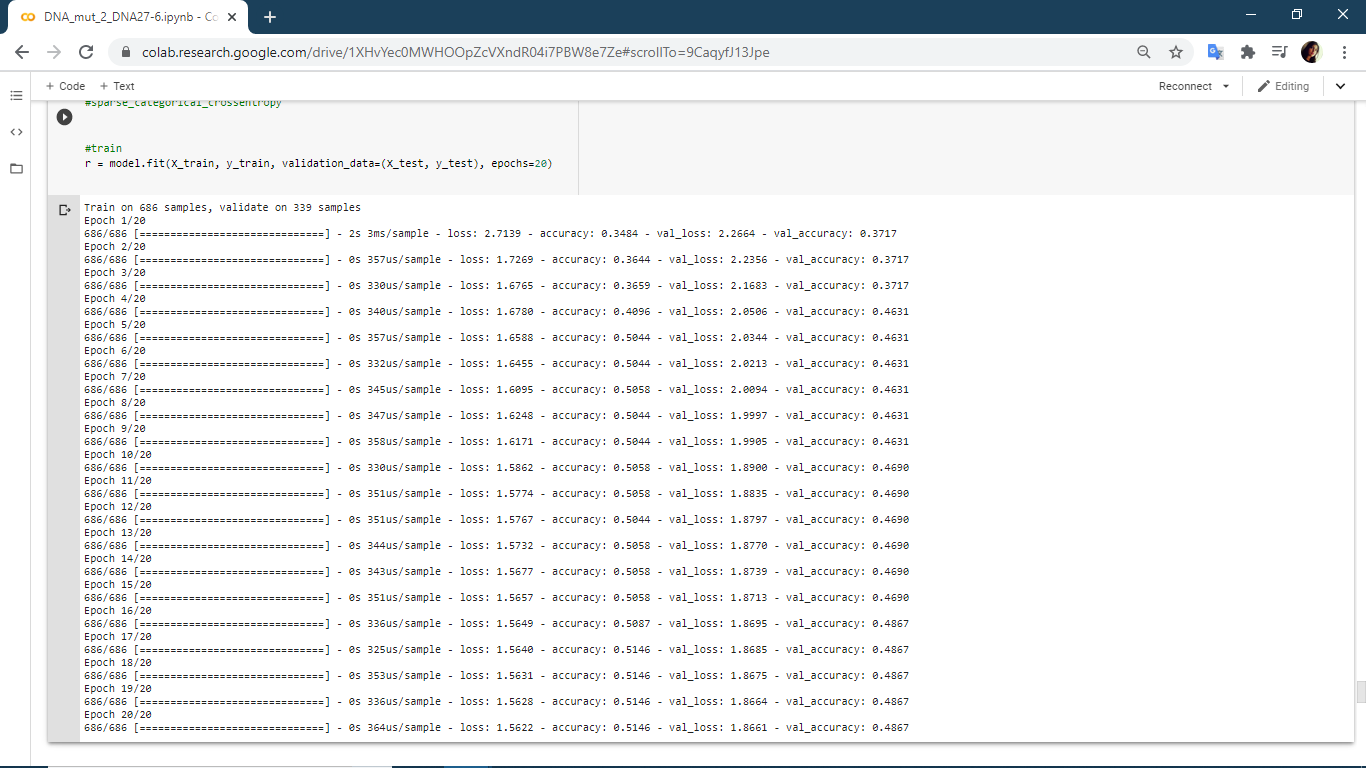


> tensorflow.org

> keras.io

> cbioportal.org







